In [1]:
using Plots

In [2]:
# 活性化関数（シグモイド）
function sigmoid(x; β=1.0, θ=0.0)
    return 1.0 / (1.0 + exp(-β * (x - θ)))
end

# パラメータ設定
τ_E = 10.0
τ_I = 10.0
w_EE = 16.0
w_EI = 12.0
w_IE = 15.0
w_II = 3.0
P_E = 0.5
P_I_base = 0.5
δP_I = 1.0       # 一時的な入力増加量
t_on = 10.0      # 外部入力が増加する時刻
t_off = 11.0     # 外部入力が元に戻る時刻

# 時間設定
dt = 0.1
T = 30.0
steps = Int(T/dt)
ts = range(0, stop=T, length=steps)

# 初期値
E = zeros(steps)
I = zeros(steps)
E[1] = 0.1
I[1] = 0.1

0.1

In [3]:
# Euler法で時間発展
for t in 1:steps-1
    time = ts[t]
    P_I = P_I_base + (t_on < time < t_off ? δP_I : 0.0)

    dE = (-E[t] + sigmoid(w_EE*E[t] - w_EI*I[t] + P_E)) / τ_E
    dI = (-I[t] + sigmoid(w_IE*E[t] - w_II*I[t] + P_I)) / τ_I

    E[t+1] = E[t] + dt * dE
    I[t+1] = I[t] + dt * dI
end

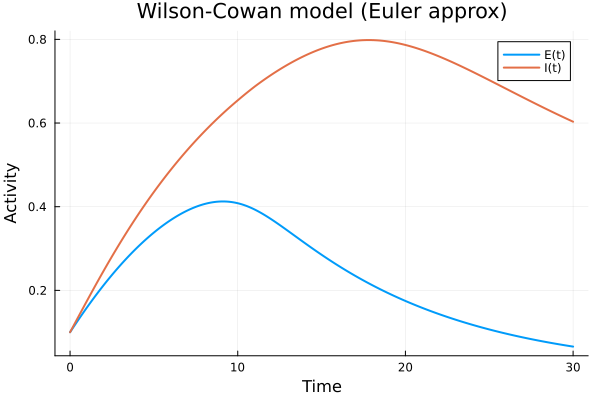

In [4]:
# プロット
plot(ts, E, label="E(t)", xlabel="Time", ylabel="Activity", legend=:topright, lw=2)
plot!(ts, I, label="I(t)", lw=2, title="Wilson-Cowan model (Euler approx)")